In [59]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import make_scorer, mean_squared_error, r2_score

from sklearn.linear_model import RidgeCV, Ridge
import numpy as np
from sklearn.datasets import make_regression
from sklearn.metrics import make_scorer
scoring_func = make_scorer(mean_squared_error,greater_is_better=False)



from csv_reader import *

In [62]:
import numpy as np
from numpy.random import default_rng
rng = default_rng()

import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer
scoring_func = make_scorer(mean_squared_error,greater_is_better=False)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300


# import pandas as pd
# from itertools import combinations
# from more_itertools import powerset
# import operator

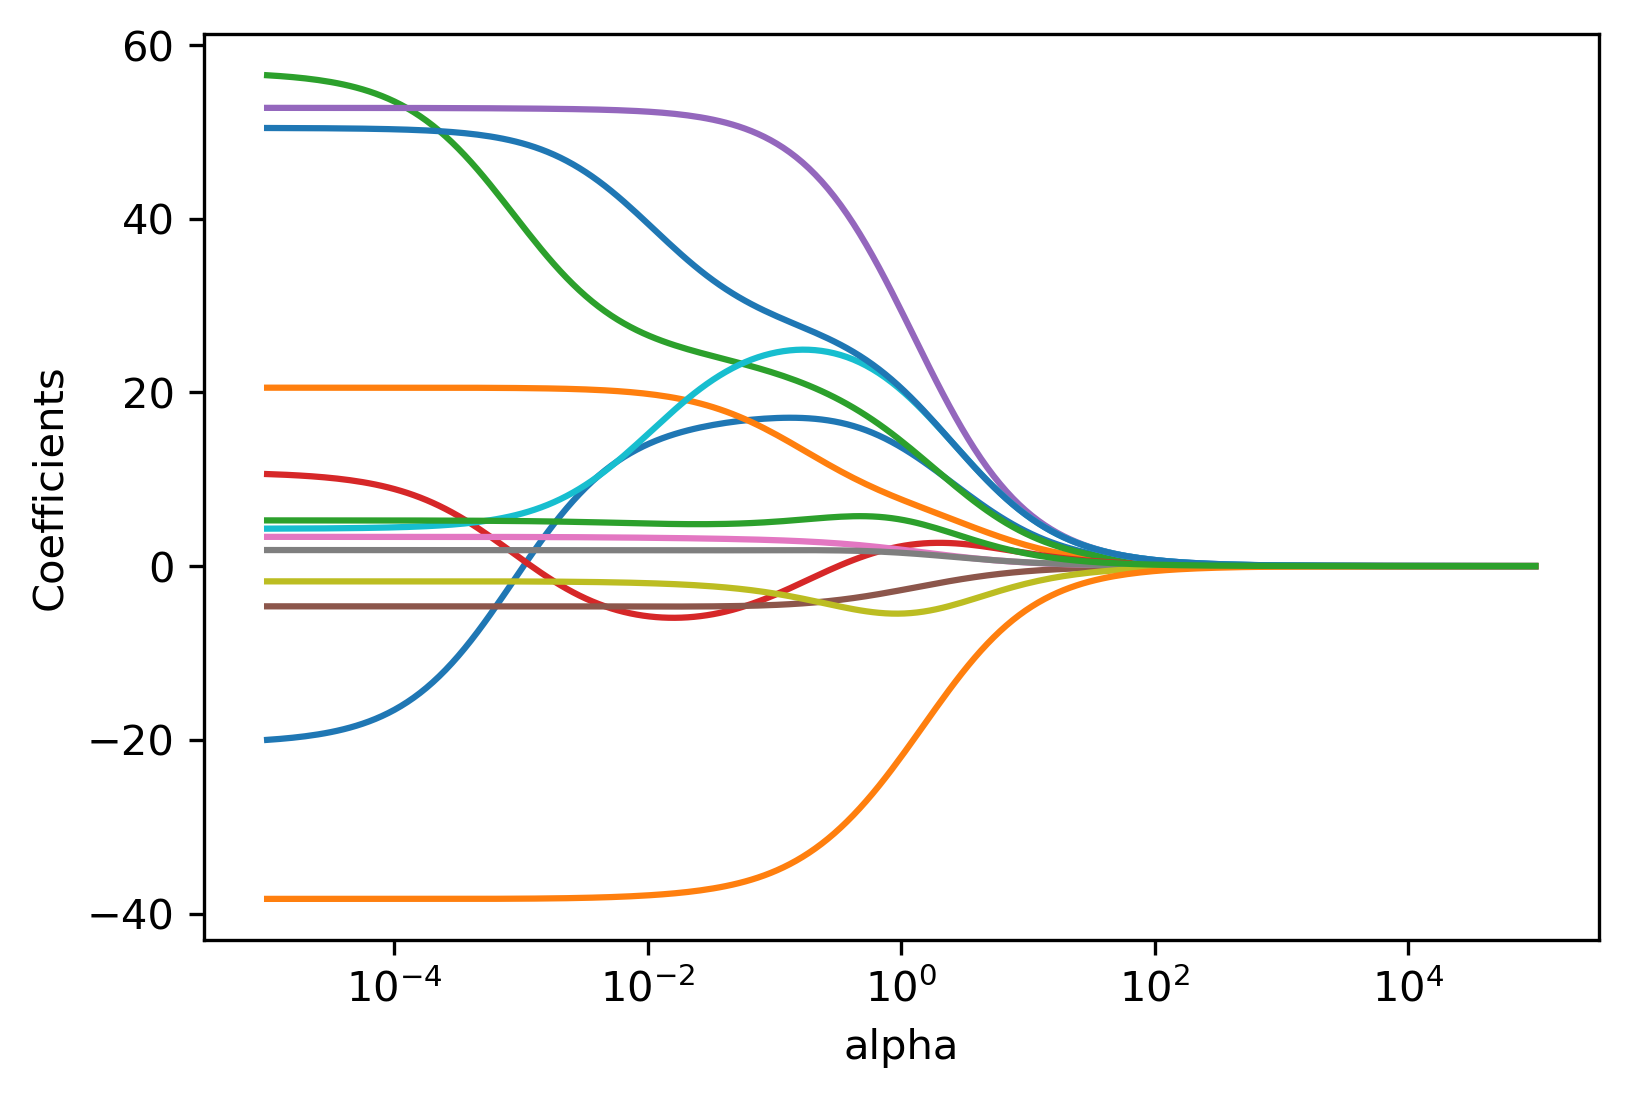

In [63]:
bike_sharing_df = get_bike_sharing_df()
bike_sharing_df.columns

Y = bike_sharing_df.cnt
X = bike_sharing_df.loc[:].drop(columns=["dteday", "casual","registered","cnt"])



X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

n_folds = 5
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas) #grid search for lambda (aka 'alpha')

parameters = { 'ridge__alpha':alphas}

scaler = StandardScaler()
ridge = Ridge(normalize=True,tol=2,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, ridge)

gs = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
gs.fit(X_train,y_train)

alphas = np.logspace(-5, 5, n_alphas) #grid search for lambda (aka 'alpha')

coefs = []
# print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
parameters = {'ridge__alpha':alphas}
# model = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
# model.fit(X_train,y_train)
for a in alphas:
    pipe.set_params(ridge__alpha=a)
    pipe.fit(X_train, y_train)
    coefs.append(pipe.named_steps['ridge'].coef_)

plt.figure()
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients');


# plt.figure()
# ax = plt.gca()
# ax.plot(alphas, coefs,'o')
# ax.set_xscale('log')
#
# plt.axis('tight')
# plt.xlabel('alpha')
# plt.ylabel('Coefficients')
# plt.title('Zoomed in')
# plt.xlim(.01,100)


In [64]:
# coefficients {𝛽1,…,𝛽𝑝} for the last fitted model in the above for loop
pipe.named_steps['ridge'].coef_

array([ 4.89877897e-04,  3.12936329e-04,  4.39586838e-04,  2.12545798e-04,
        7.08538990e-04, -6.69623759e-05,  4.61428692e-05,  5.15880306e-05,
       -2.50577174e-04,  7.17527456e-04,  7.14296105e-04, -5.73945874e-04,
        1.63413572e-04])

In [65]:
# B0
pipe.named_steps['ridge'].intercept_

188.19144550373616

In [66]:
# Average of Y's
np.mean(y_train)

188.19144550373616

In [67]:
# Best alpha
best_alpha = gs.best_params_['ridge__alpha']
print(best_alpha)

0.00325508859983506


In [68]:
scaler = StandardScaler()
ridge = Ridge(alpha=best_alpha,normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, ridge)
pipe.fit(X_train, y_train)

best_coef_ridge = pipe.named_steps['ridge'].coef_

# print('The final set of coefficients: ')
print(best_coef_ridge)

[-20.41926545  20.53690934  56.8657591   10.79962506  52.75158604
  -4.63418301   3.36520417   1.84579269  -1.75859723   4.29540375
  50.44803078 -38.31229317   5.26018276]


In [69]:
print('\nCoefficients  [ridge]')
for i in range(0,13):
    print('   Feature %2i:  %.2f'%(i,\
                    best_coef_ridge[i]))


Coefficients  [ridge]
   Feature  0:  -20.42
   Feature  1:  20.54
   Feature  2:  56.87
   Feature  3:  10.80
   Feature  4:  52.75
   Feature  5:  -4.63
   Feature  6:  3.37
   Feature  7:  1.85
   Feature  8:  -1.76
   Feature  9:  4.30
   Feature 10:  50.45
   Feature 11:  -38.31
   Feature 12:  5.26


In [70]:
y_pred = pipe.predict(x_test)
mse_test_using_ridge = mean_squared_error(y_test,y_pred)
# print(mse_test_using_coef_true)
print('\nTest set MSE using ridge coefficients: %.2f'%mse_test_using_ridge)


Test set MSE using ridge coefficients: 20602.82


In [72]:


y_train_pred = lm.predict(sm.add_constant(X_train))
y_test_pred = lm.predict(sm.add_constant(x_test))

print('Train Score: ')
print(r2_score(y_train, y_train_pred))

print('\nTest Score: ')
print(r2_score(y_test, y_test_pred))

Train Score: 
0.384348865204749

Test Score: 
0.3966929654752972
